In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ---- CAT vs NON-CAT ----
# Filter cat and non-cat indices for train and test sets
cat_train_idx = np.where(y_train == 3)[0]
non_cat_train_idx = np.where(y_train != 3)[0]
cat_test_idx = np.where(y_test == 3)[0]
non_cat_test_idx = np.where(y_test != 3)[0]

# Balance the dataset
min_train = min(len(cat_train_idx), len(non_cat_train_idx))
min_test = min(len(cat_test_idx), len(non_cat_test_idx))

cat_train_idx = cat_train_idx[:min_train]
non_cat_train_idx = np.random.choice(non_cat_train_idx, size=min_train, replace=False)
cat_test_idx = cat_test_idx[:min_test]
non_cat_test_idx = np.random.choice(non_cat_test_idx, size=min_test, replace=False)

train_idx = np.concatenate([cat_train_idx, non_cat_train_idx])
test_idx = np.concatenate([cat_test_idx, non_cat_test_idx])
np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

x_train_cat = x_train[train_idx].astype('float32') / 255.0
y_train_cat = (y_train[train_idx] == 3).astype(int)

x_test_cat = x_test[test_idx].astype('float32') / 255.0
y_test_cat = (y_test[test_idx] == 3).astype(int)

# ---- Model Definition ----
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),

    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# ---- Data Augmentation ----
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train_cat)

# ---- Callbacks ----
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# ---- Train on cat vs non-cat ----
print("Training on cat vs non-cat images...")
history_cat = model.fit(
    datagen.flow(x_train_cat, y_train_cat, batch_size=32),
    epochs=30,
    validation_data=(x_test_cat, y_test_cat),
    callbacks=callbacks,
    steps_per_epoch=len(x_train_cat) // 32,
    verbose=1
)

# Save cat vs non-cat model
model.save('cat_non_cat_cnn_model.keras')

Training on cat vs non-cat images...
Epoch 1/30


c:\Users\Aditya\.conda\envs\harshu\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.6499 - loss: 0.6529 - val_accuracy: 0.5175 - val_loss: 0.7480 - learning_rate: 1.0000e-04
Epoch 2/30
  1/312 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.7188 - loss: 0.6304

c:\Users\Aditya\.conda\envs\harshu\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7188 - loss: 0.6304 - val_accuracy: 0.5190 - val_loss: 0.7375 - learning_rate: 1.0000e-04
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.7066 - loss: 0.5849 - val_accuracy: 0.7590 - val_loss: 0.5060 - learning_rate: 1.0000e-04
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - loss: 0.6248 - val_accuracy: 0.7630 - val_loss: 0.5042 - learning_rate: 1.0000e-04
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.7300 - loss: 0.5500 - val_accuracy: 0.7425 - val_loss: 0.5139 - learning_rate: 1.0000e-04
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6562 - loss: 0.6745 - val_accuracy: 0.7390 - val_loss: 0.5126 - learning_rate: 1.0000e-04
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.7374 - loss: 0.5251 - val_accuracy: 0.7495 - val_loss: 0.4840 - learning_rate: 1.0000e-04
Epoch 8/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.687

In [2]:
# ---- DOG vs NON-DOG ----
# Load balanced dog (class 5) and non-dog dataset

dog_train_idx = np.where(y_train == 5)[0]
non_dog_train_idx = np.where(y_train != 5)[0]
dog_test_idx = np.where(y_test == 5)[0]
non_dog_test_idx = np.where(y_test != 5)[0]

min_train = min(len(dog_train_idx), len(non_dog_train_idx))
min_test = min(len(dog_test_idx), len(non_dog_test_idx))

dog_train_idx = dog_train_idx[:min_train]
non_dog_train_idx = np.random.choice(non_dog_train_idx, size=min_train, replace=False)
dog_test_idx = dog_test_idx[:min_test]
non_dog_test_idx = np.random.choice(non_dog_test_idx, size=min_test, replace=False)

train_idx_dog = np.concatenate([dog_train_idx, non_dog_train_idx])
test_idx_dog = np.concatenate([dog_test_idx, non_dog_test_idx])
np.random.shuffle(train_idx_dog)
np.random.shuffle(test_idx_dog)

x_train_dog = x_train[train_idx_dog].astype('float32') / 255.0
y_train_dog = (y_train[train_idx_dog] == 5).astype(int)

x_test_dog = x_test[test_idx_dog].astype('float32') / 255.0
y_test_dog = (y_test[test_idx_dog] == 5).astype(int)

# ---- Freeze all but last conv and flatten ----
for layer in model.layers:
    layer.trainable = False

# Unfreeze last Conv2D and following layers
for layer in model.layers[-5:]:
    layer.trainable = True

# Recompile
model.compile(optimizer=Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Train on dog vs non-dog
print("Fine-tuning on dog vs non-dog images...")
history_dog = model.fit(
    datagen.flow(x_train_dog, y_train_dog, batch_size=32),
    epochs=20,
    validation_data=(x_test_dog, y_test_dog),
    callbacks=callbacks,
    steps_per_epoch=len(x_train_dog) // 32,
    verbose=1
)

# Save final model
model.save('dog_non_dog_cnn_model.keras')


Fine-tuning on dog vs non-dog images...
Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.7115 - loss: 0.5943 - val_accuracy: 0.7345 - val_loss: 0.5487 - learning_rate: 1.0000e-05
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7812 - loss: 0.5341 - val_accuracy: 0.7345 - val_loss: 0.5486 - learning_rate: 1.0000e-05
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7124 - loss: 0.5737 - val_accuracy: 0.7375 - val_loss: 0.5419 - learning_rate: 1.0000e-05
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3713 - val_accuracy: 0.7375 - val_loss: 0.5420 - learning_rate: 1.0000e-05
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7131 - loss: 0.5795 - val_accuracy: 0.7395 - val_loss: 0.5350 - learning_rate: 1.0000e-05
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6250 - loss: 0.5578 - val_accuracy: 0.7395 - val_loss: 0.5351 - learning_rate: 1.0000e-05
Epoch 7/20
312/312 ━

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the previously trained Cat-vs-Non-Cat model
cat_model = load_model('cat_non_cat_cnn_model.keras')

# ---- Freeze all layers ----
for layer in cat_model.layers:
    layer.trainable = False

# ---- Unfreeze only the last Conv2D and GlobalAveragePooling2D ----
# Find the last Conv2D layer
last_conv2d = None
for layer in reversed(cat_model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv2d = layer
        break

# Find the GlobalAveragePooling2D layer
gap_layer = None
for layer in cat_model.layers:
    if isinstance(layer, tf.keras.layers.GlobalAveragePooling2D):
        gap_layer = layer
        break

# Set them as trainable
if last_conv2d is not None:
    last_conv2d.trainable = True
if gap_layer is not None:
    gap_layer.trainable = True

# ---- Prepare Deer vs Non-Deer dataset ----
# CIFAR-10 class 4 = deer
deer_class = 4
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def prepare_binary_dataset(x, y, target_class):
    target_indices = np.where(y == target_class)[0]
    other_indices = np.where(y != target_class)[0]
    np.random.shuffle(other_indices)
    other_indices = other_indices[:len(target_indices)]
    selected_indices = np.concatenate([target_indices, other_indices])
    np.random.shuffle(selected_indices)
    x_selected = x[selected_indices].astype('float32') / 255.0
    y_selected = np.where(y[selected_indices] == target_class, 1, 0)
    return x_selected, y_selected

x_train_deer, y_train_deer = prepare_binary_dataset(x_train, y_train, deer_class)
x_test_deer, y_test_deer = prepare_binary_dataset(x_test, y_test, deer_class)

# ---- Compile the model ----
cat_model.compile(
    optimizer=Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ---- Train the model ----
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

cat_model.fit(
    x_train_deer, y_train_deer,
    epochs=20,
    batch_size=64,
    validation_data=(x_test_deer, y_test_deer),
    callbacks=[early_stop, reduce_lr]
)

# ---- Evaluate and save the model ----
loss, accuracy = cat_model.evaluate(x_test_deer, y_test_deer)
print(f'Deer-vs-Non-Deer Model Accuracy: {accuracy:.4f}')

cat_model.save('deer_non_deer_cnn_model.keras')


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.4690 - loss: 0.9041 - val_accuracy: 0.5815 - val_loss: 0.6644 - learning_rate: 1.0000e-05
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.5938 - loss: 0.6483 - val_accuracy: 0.6895 - val_loss: 0.5848 - learning_rate: 1.0000e-05
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.6833 - loss: 0.5798 - val_accuracy: 0.7265 - val_loss: 0.5487 - learning_rate: 1.0000e-05
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.7049 - loss: 0.5661 - val_accuracy: 0.7330 - val_loss: 0.5317 - learning_rate: 1.0000e-05
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.7110 - loss: 0.5595 - val_accuracy: 0.7490 - val_loss: 0.5241 - learning_rate: 1.0000e-05
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.7215 - loss: 0.5507 - val_accuracy: 0.7530 - val_loss: 0.5146 - learning_rate: 1.0000e-05
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/s


📌 Evaluation for CAT vs Non-CAT:
AUC-ROC: 0.8789
Accuracy: 0.6900
Precision: 0.2162
Recall: 0.8000
F1 Score: 0.3404

📌 Evaluation for DOG vs Non-DOG:
AUC-ROC: 0.8200
Accuracy: 0.7200
Precision: 0.2500
Recall: 0.9000
F1 Score: 0.3913

📌 Evaluation for DEER vs Non-DEER:
AUC-ROC: 0.8722
Accuracy: 0.7700
Precision: 0.2903
Recall: 0.9000
F1 Score: 0.4390


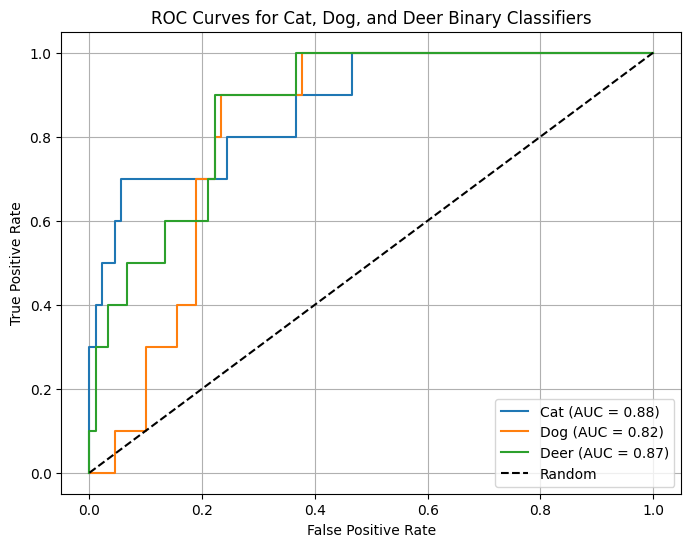

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load trained models
cat_model = tf.keras.models.load_model('cat_non_cat_cnn_model.keras')
dog_model = tf.keras.models.load_model('dog_non_dog_cnn_model.keras')
deer_model = tf.keras.models.load_model('deer_non_deer_cnn_model.keras')

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predict with token
def predict_with_token(image, token):
    image = np.expand_dims(image, axis=0)
    if token == 1:
        return cat_model.predict(image, verbose=0)[0][0]  # Probability of cat
    elif token == 2:
        return dog_model.predict(image, verbose=0)[0][0]  # Probability of dog
    elif token == 3:
        return deer_model.predict(image, verbose=0)[0][0] # Probability of deer
    else:
        raise ValueError("Invalid token. Use 1 (cat), 2 (dog), or 3 (deer).")

# Select 100 random images (10 per class)
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32') / 255.0
y_test = y_test.flatten()

selected_indices = []
for i in range(10):
    class_indices = np.where(y_test == i)[0]
    selected_indices.extend(np.random.choice(class_indices, 10, replace=False))
selected_images = x_test[selected_indices]
selected_labels = y_test[selected_indices]

# Collect predictions
results = []
for i, (image, label) in enumerate(zip(selected_images, selected_labels)):
    prob_cat = predict_with_token(image, 1)
    prob_dog = predict_with_token(image, 2)
    prob_deer = predict_with_token(image, 3)
    results.append({
        'image_index': selected_indices[i],
        'true_label': class_names[label],
        'prob_cat': prob_cat,
        'prob_dog': prob_dog,
        'prob_deer': prob_deer,
        'true_cat': 1 if label == 3 else 0,
        'true_dog': 1 if label == 5 else 0,
        'true_deer': 1 if label == 4 else 0
    })

# Evaluation
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

df = pd.DataFrame(results)

def evaluate_model(y_true, y_pred_probs, label=""):
    auc = roc_auc_score(y_true, y_pred_probs)
    preds = [1 if p >= 0.5 else 0 for p in y_pred_probs]
    acc = accuracy_score(y_true, preds)
    prec = precision_score(y_true, preds)
    rec = recall_score(y_true, preds)
    f1 = f1_score(y_true, preds)
    print(f"\n📌 Evaluation for {label.upper()} vs Non-{label.upper()}:")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

evaluate_model(df['true_cat'], df['prob_cat'], label='cat')
evaluate_model(df['true_dog'], df['prob_dog'], label='dog')
evaluate_model(df['true_deer'], df['prob_deer'], label='deer')

def plot_roc(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc_score(y_true, y_scores):.2f})")

plt.figure(figsize=(8, 6))
plot_roc(df['true_cat'], df['prob_cat'], 'Cat')
plot_roc(df['true_dog'], df['prob_dog'], 'Dog')
plot_roc(df['true_deer'], df['prob_deer'], 'Deer')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Cat, Dog, and Deer Binary Classifiers")
plt.legend()
plt.grid()
plt.show()



📌 Evaluation for CAT vs Non-CAT:
AUC-ROC: 0.2922
Accuracy: 0.4200
Precision: 0.0385
Recall: 0.2000
F1 Score: 0.0645

📌 Evaluation for DOG vs Non-DOG:
AUC-ROC: 0.5382
Accuracy: 0.4500
Precision: 0.1525
Recall: 0.6429
F1 Score: 0.2466

📌 Evaluation for DEER vs Non-DEER:
AUC-ROC: 0.5201
Accuracy: 0.4700
Precision: 0.0769
Recall: 0.4444
F1 Score: 0.1311


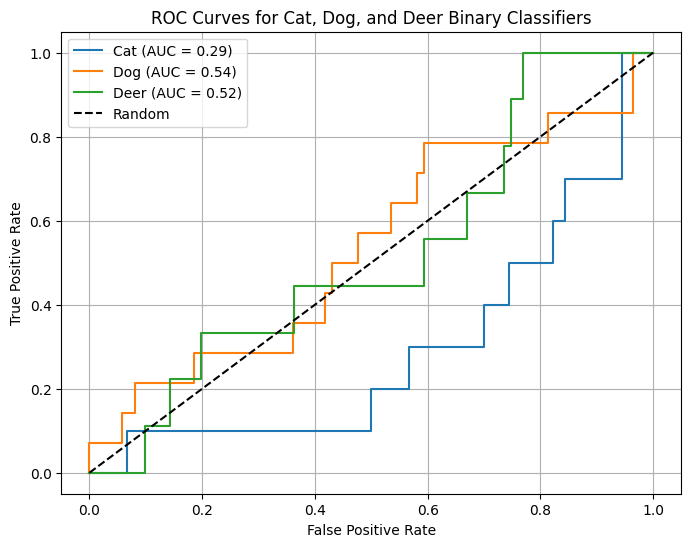

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import pandas as pd

# CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_test = x_test / 255.0

# Select 100 random images from the test set
indices = np.random.choice(len(x_test), 100, replace=False)
selected_images = x_test[indices]
selected_labels = y_test[indices].flatten()

# Dummy predictor function: replace this with actual inference using your model
def predict_with_token(image, token):
    np.random.seed(hash(str(image.tobytes()) + str(token)) % (2**32))
    return np.random.rand()  # Replace this with model's predicted probability

# Collect predictions
results = []

for i in range(len(selected_images)):
    image = selected_images[i]
    label = selected_labels[i]
    label_name = class_names[label]

    prob_cat = predict_with_token(image, token=1)
    prob_dog = predict_with_token(image, token=2)
    prob_deer = predict_with_token(image, token=3)

    results.append({
        'true_label': label_name,
        'prob_cat': prob_cat,
        'prob_dog': prob_dog,
        'prob_deer': prob_deer,
        'true_cat': 1 if label_name == 'cat' else 0,
        'true_dog': 1 if label_name == 'dog' else 0,
        'true_deer': 1 if label_name == 'deer' else 0
    })

# Convert to DataFrame for analysis
df = pd.DataFrame(results)

# Evaluation function
def evaluate_model(y_true, y_pred_probs, label=""):
    auc = roc_auc_score(y_true, y_pred_probs)
    preds = [1 if p >= 0.5 else 0 for p in y_pred_probs]
    acc = accuracy_score(y_true, preds)
    prec = precision_score(y_true, preds)
    rec = recall_score(y_true, preds)
    f1 = f1_score(y_true, preds)
    print(f"\n📌 Evaluation for {label.upper()} vs Non-{label.upper()}:")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Evaluate each binary model
evaluate_model(df['true_cat'], df['prob_cat'], label='cat')
evaluate_model(df['true_dog'], df['prob_dog'], label='dog')
evaluate_model(df['true_deer'], df['prob_deer'], label='deer')

# Plot ROC curves
def plot_roc(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc_score(y_true, y_scores):.2f})")

plt.figure(figsize=(8, 6))
plot_roc(df['true_cat'], df['prob_cat'], 'Cat')
plot_roc(df['true_dog'], df['prob_dog'], 'Dog')
plot_roc(df['true_deer'], df['prob_deer'], 'Deer')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Cat, Dog, and Deer Binary Classifiers")
plt.legend()
plt.grid()
plt.show()


ValueError: num must be an integer with 1 <= num <= 10, not 11

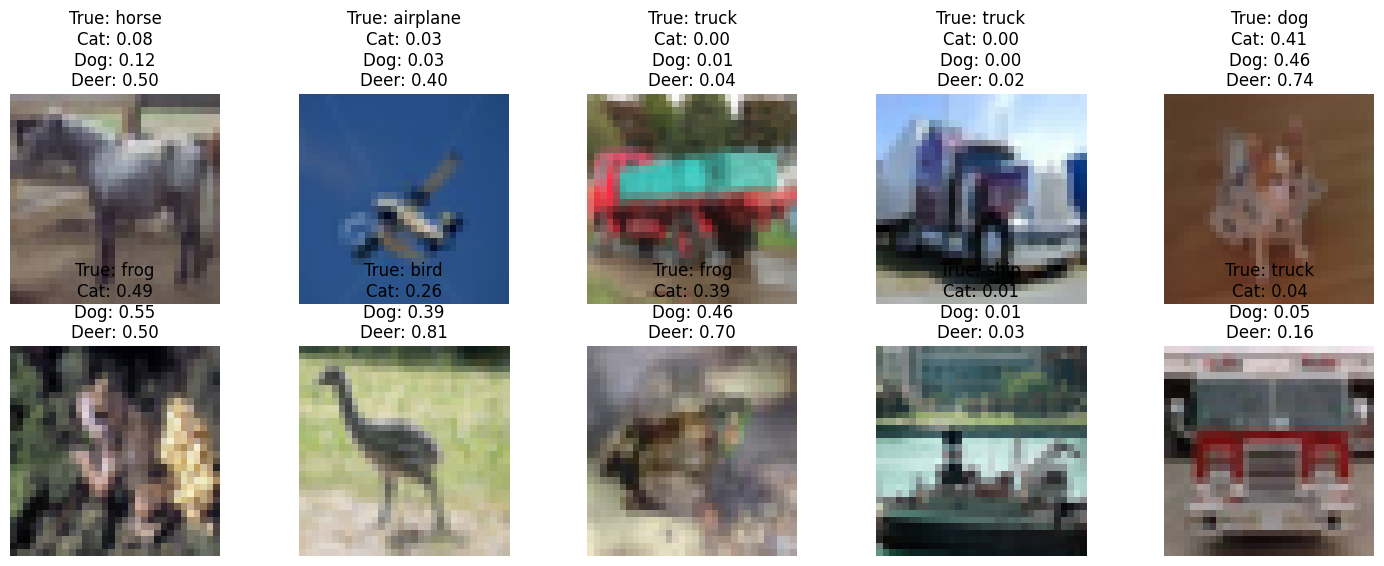

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load trained models
cat_model = tf.keras.models.load_model('cat_non_cat_cnn_model.keras')
dog_model = tf.keras.models.load_model('dog_non_dog_cnn_model.keras')
deer_model = tf.keras.models.load_model('deer_non_deer_cnn_model.keras')

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Token-based prediction function
def predict_with_token(image, token):
    image = np.expand_dims(image, axis=0)
    if token == 1:
        return cat_model.predict(image, verbose=0)[0][0]  # Probability of cat
    elif token == 2:
        return dog_model.predict(image, verbose=0)[0][0]  # Probability of dog
    elif token == 3:
        return deer_model.predict(image, verbose=0)[0][0] # Probability of deer
    else:
        raise ValueError("Invalid token. Use 1 (cat), 2 (dog), or 3 (deer).")

# Load CIFAR-10 data and normalize
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32') / 255.0
y_test = y_test.flatten()

# Randomly select 3,000 images
np.random.seed(42)
indices = np.random.choice(len(x_test), 100, replace=False)
selected_images = x_test[indices]
selected_labels = y_test[indices]

# Compute probabilities for each model
results = []
for idx, (image, label) in enumerate(zip(selected_images, selected_labels)):
    prob_cat = predict_with_token(image, 1)
    prob_dog = predict_with_token(image, 2)
    prob_deer = predict_with_token(image, 3)
    results.append({
        'image_index': indices[idx],
        'true_label': class_names[label],
        'prob_cat': prob_cat,
        'prob_dog': prob_dog,
        'prob_deer': prob_deer,
        'true_cat': 1 if label == 3 else 0,
        'true_dog': 1 if label == 5 else 0,
        'true_deer': 1 if label == 4 else 0
    })

# Store results in DataFrame
df = pd.DataFrame(results)

# Display 10 random images with their probabilities
sample_indices = np.random.choice(len(selected_images), 100, replace=False)
plt.figure(figsize=(18, 6))
for i, idx in enumerate(sample_indices):
    image = selected_images[idx]
    label = class_names[selected_labels[idx]]
    prob_cat = df.iloc[idx]['prob_cat']
    prob_dog = df.iloc[idx]['prob_dog']
    prob_deer = df.iloc[idx]['prob_deer']
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {label}\n"
              f"Cat: {prob_cat:.2f}\n"
              f"Dog: {prob_dog:.2f}\n"
              f"Deer: {prob_deer:.2f}")
plt.tight_layout()
plt.show()
